## Final Project Submission


* Student name: Samwel Kagwi
* Students pace: Full time
* Scheduled project review date/time: 24/05/2023
* Instructor name: 
* Blog post URL: https://github.com/S-Kagwi/Phase-3-Project


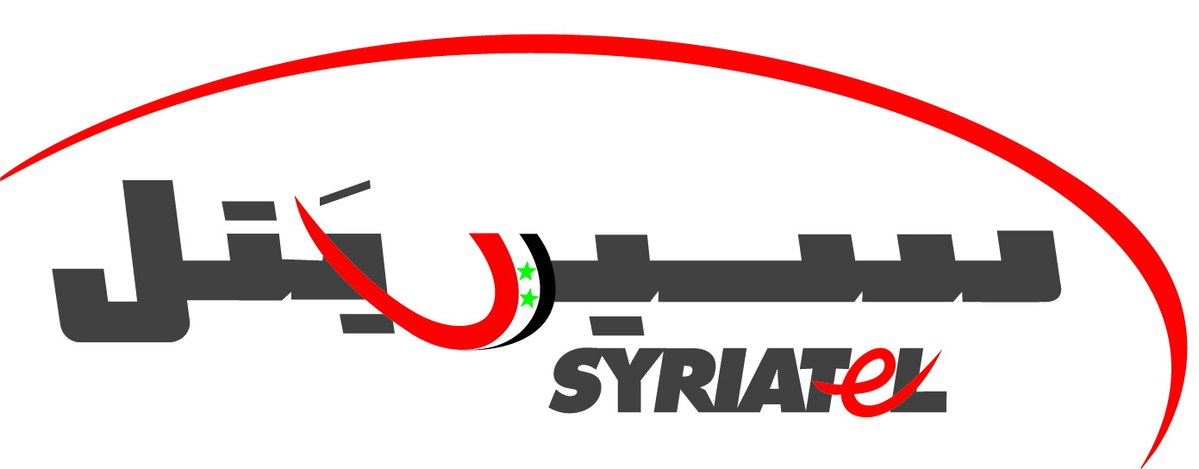

## SYRIATEL CUSTOMER CHURN ANALYSIS

## BUSINESS UNDERSTANDING

### Introduction

Telecommunications is a fast growing industry that experiences fierce competition with many options for clients to choose from.

SyriaTel, a telecommunications company would like to reduce money spent in the event of loosing customers and acquistion of new customers. The task at hand is to use machine learning algorithms to be able to predict the likelihoold of a customer churning from syriaTel. Churning refers to when a subscriber cancels, stops or does not renew a subscription service.

We plan on using predictive modeling to be able to identify the possibility and which customer will probably churn. This will help Syriatel to make more informed decisions in a bid to reduce customer churning and improve profits.

### OBJECTIVES 

- To be able to build a model that is able to predict whether a customer will churn

#### Specific objectives
 - To predict whether a customer will churn or not
 - To identify which variables affect possibility of customer churn
 - To visualize the relationship and distribution of various variables



# DATA UNDERSTANDING

In [1]:
#we import the libraries that we will use for this project
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [6]:
#we load the data
df = pd.read_csv("churn_data.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [7]:
#we preview the first 5 rows of the data

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
#check a summary information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Preparation

In [25]:
def analyze(df):
    
    #check the shape of the dataframe
    print(f"This data set contains {(df.shape)} rows and columns")

    # Check the data types of each column in the DataFrame
    print("\nData types of columns in the DataFrame:")
    print(df.dtypes)
    
    #check the counts for each data type
    print(df.dtypes.value_counts())

    # Check for unique values in each column of the DataFrame
    print("\nUnique values in each column of the DataFrame:")
    for col in df.columns:
        unique_values = df[col].nunique()
        print(f"{col}: {unique_values}")
        
    # Check for missing values in the DataFrame
    print("\nMissing values in the DataFrame:")
    print(df.isnull().sum())

    # Check for duplicate values in the DataFrame
    print("\nDuplicate values in the DataFrame:")
    print(df.duplicated().sum())          
            
analyze(df)

This data set contains (3333, 21) rows and columns

Data types of columns in the DataFrame:
state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
int64      8
float64    8
object     4
bool       1
dtype: int64

Unique values in each column of the DataFrame:
state: 51
account length: 212
area code: 3
phone number: 3333
inter

Based on the above analysis, we can see that the dataset has 3,333 row and 21 columns.

The data has four different data types: integers, floats, objects and boolean.

The data set does not have any missing values or duplicated values, hence we can proceed with further analysis to check for patterns and distributions.

# EDA

In [26]:
#check categoricals columns 

categorical_columns = df.select_dtypes(include="object")
print(categorical_columns.columns)
categorical_columns.head()

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


,state,phone number,international plan,voice mail plan
0,KS,382-4657,no,yes
1,OH,371-7191,no,yes
2,NJ,358-1921,no,no
3,OH,375-9999,yes,no
4,OK,330-6626,yes,no


In [27]:
#check numerical columns
numerical_columns = df.select_dtypes(include= "number")
print(numerical_columns.columns)
numerical_columns.head()


Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [28]:
#check boolean columns
boolean_columns = df.select_dtypes(include= "bool")
print(boolean_columns.columns)
boolean_columns.head()

Index(['churn'], dtype='object')


,churn
0,False
1,False
2,False
3,False
4,False


In [29]:
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

## Categorical columns

### Analysis of single variables

In [30]:
# plotting categorical values and printing their values counts
def count_plot_for(feature):
  sns.countplot(data=df, x=feature)
  plt.title(feature)
  plt.show()
  
  print(df[feature].value_counts())

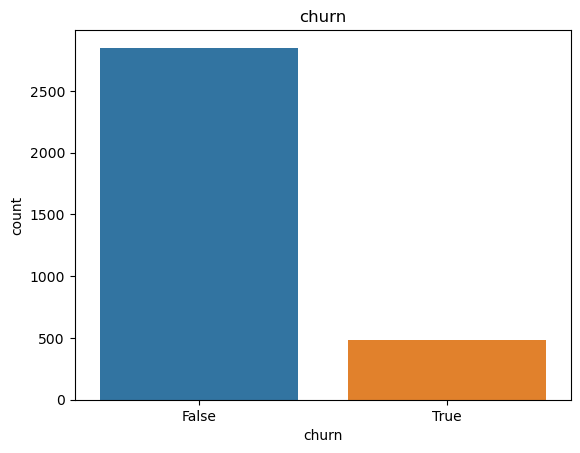

False    2850
True      483
Name: churn, dtype: int64


In [31]:
count_plot_for("churn")

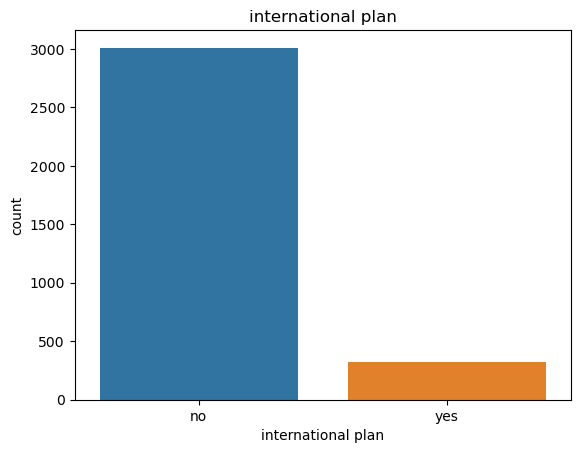

no     3010
yes     323
Name: international plan, dtype: int64


In [32]:
count_plot_for("international plan")

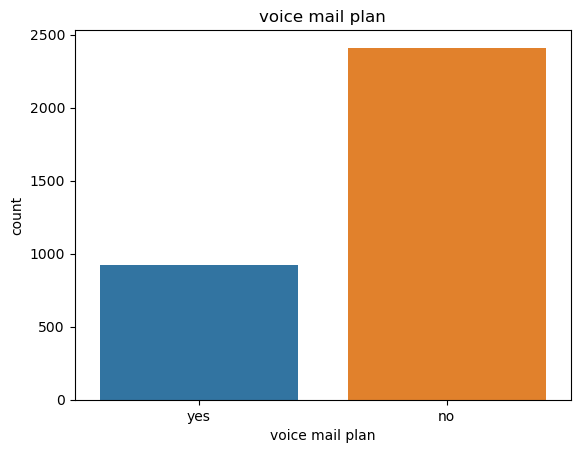

no     2411
yes     922
Name: voice mail plan, dtype: int64


In [33]:
count_plot_for("voice mail plan")

### Bivariate analysis

In [35]:
#we generate a count plot to show the count of observations for each category of feature

def bivariate_analysis(feature, categorical_variable):
  sns.countplot(data=df, x=feature, hue=categorical_variable)
  plt.title(f"{feature} vs {categorical_variable}")
  plt.show()

  print(df.groupby([feature, categorical_variable]).size())

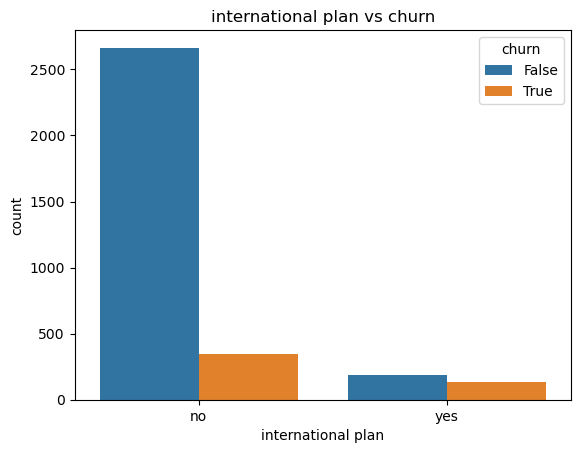

international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
dtype: int64


In [37]:
bivariate_analysis("international plan", "churn")

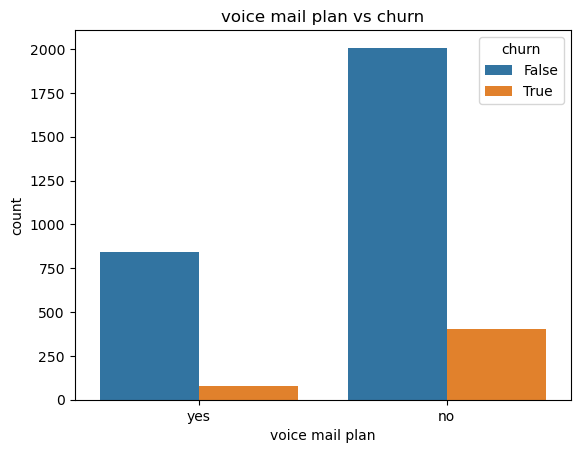

voice mail plan  churn
no               False    2008
                 True      403
yes              False     842
                 True       80
dtype: int64


In [38]:
bivariate_analysis("voice mail plan", "churn")

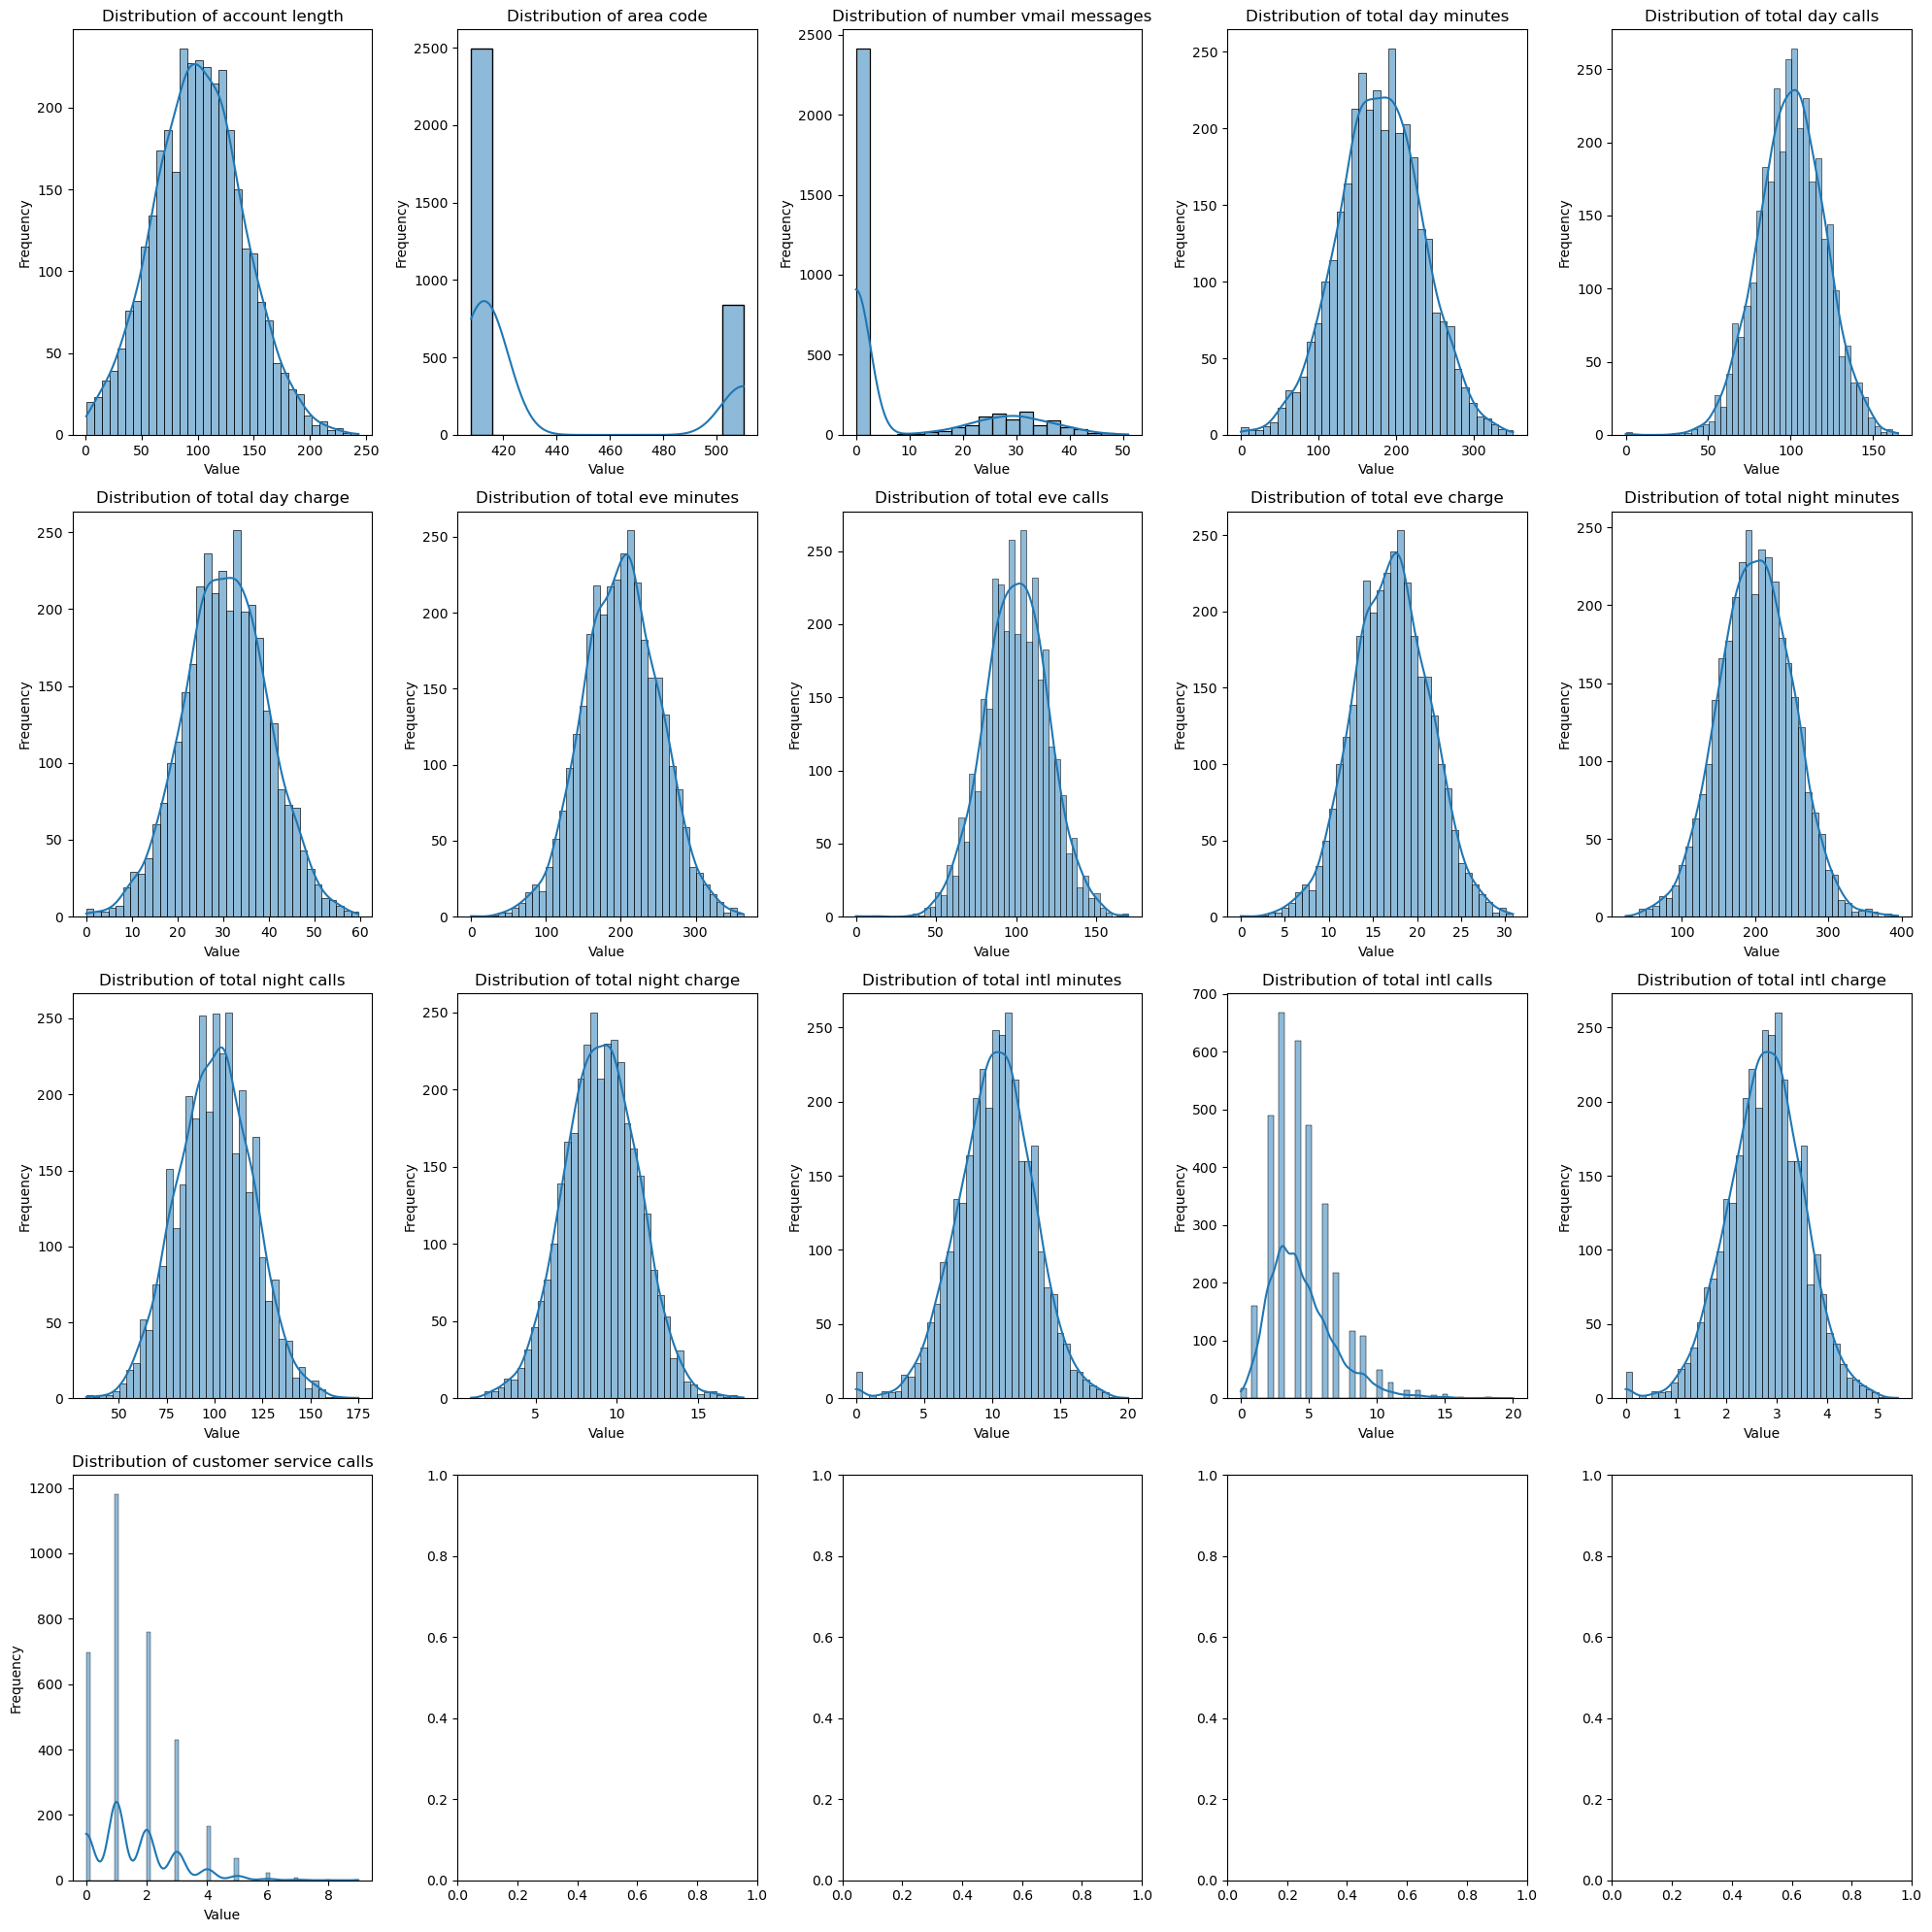

In [39]:
fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 20))

for ax, col in zip(axs.ravel(), df.select_dtypes(include='number').columns):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {col}')
    

plt.tight_layout()
plt.show()

# multivariate analysis

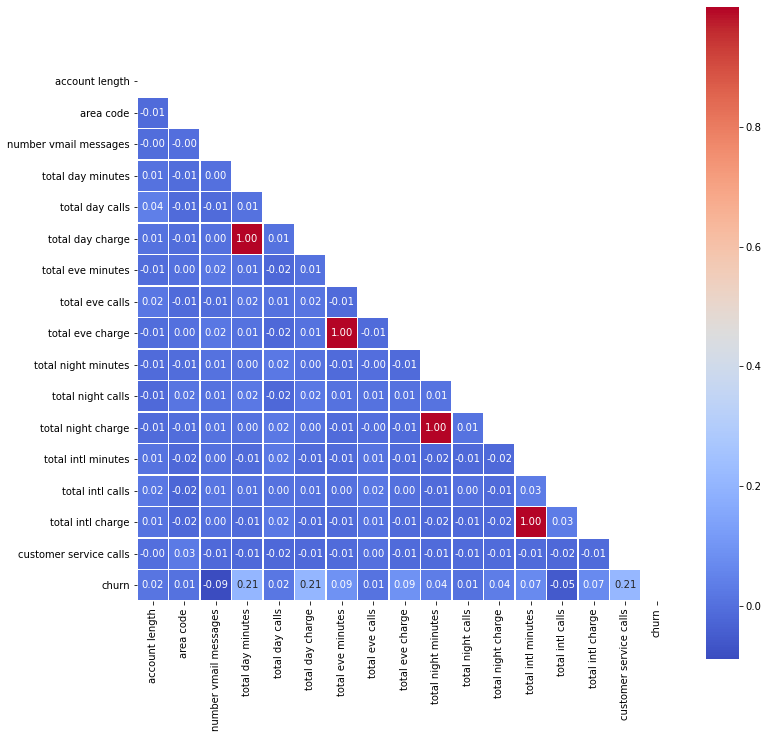

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [21]:
#checking more information about the numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# EDA analysis 
- our data is imbalanced  with 2850 people not churning  and 483 churning.
- people with no voicemail churned the most with 403 people churning followed by people with no international plan where 346 churned.
- all our numerical columns are normally distributed apart from area code.
- the variables have low correlation.

### Feature engineering

Dealing with categorical columns - using label encoding

-   i choose to convert my categorical columns to numerical by using label encoding because it is easy to understand and interprate as it gives unique integers to each value and we saw from above the features had two unique values making it a better choice 

In [22]:
# instantiate encoder and fit it
le = LabelEncoder()
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])
df['international plan'] = le.fit_transform(df['international plan'])


In [23]:
# fit labelencoder on churn
le = LabelEncoder()
df['churn'] = le.fit_transform(df['churn'])


In [24]:
#dropping state and phone number because they are not relevant in our analysis
df = df.drop(['state', 'phone number'], axis=1)


In [25]:
#one hot encode the column of Area code
df = pd.get_dummies(df, columns=['area code'], drop_first=True)



# Modeling

In [26]:
#selecting x values and y for moddeling
#we will use "churn" as our target variables so we drop the column from the dependent variables
X = df.drop('churn', axis=1)
y = df['churn']

# Perform a train_test split
# split the data to use 20% of the data as test data and random state 87 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)



using starndard scaler to scale training dataset and transform test data set

In [27]:
#instanciating the scaler
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

- To solve the imbalance noticed above we use Synthetic Minority Oversampling Technique `SMOTE`

In [28]:
# fitting smote to solve for imbalanced data
smote = SMOTE(random_state=87)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train)


Baseline model is logisticregression

fitting first classification model to the training data


In [29]:
# instantiate model with random state of 87
baseline_model = LogisticRegression(random_state=87)

#fit training data into the model
baseline_model.fit(X_train_scale, y_train)


LogisticRegression(random_state=87)

Using the first model to make prediction on training and test data set

In [30]:
#making  test predictions
y_test_pred = baseline_model.predict(X_test_scale)

#making train predictions
y_train_pred = baseline_model.predict(X_train_scale)

In [31]:
# cross validation score of model
baseline_cv = cross_val_score(baseline_model, X_train_scale, y_train)
baseline_cv

array([0.84456929, 0.85178236, 0.86491557, 0.85365854, 0.85553471])

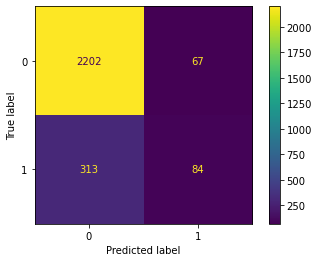

In [32]:
#confusion matrix
ConfusionMatrixDisplay.from_estimator(baseline_model, X_train_scale, y_train);

In [33]:
#classification report of model
base_report = classification_report(y_test, y_test_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       581
           1       0.50      0.21      0.30        86

    accuracy                           0.87       667
   macro avg       0.70      0.59      0.61       667
weighted avg       0.84      0.87      0.85       667



# EVALUATION 

Recal   is the percentage of actual positive instances that were correctly predicted

 In this case, the recall for customers who did not churn is 97%, which means that 97% of the customers who did not churn were correctly predicted which is good for business. 
 The recall for customers who churned is 21%, which means that 21% of the customers who churned was correctly predicted this is a low number that may lead to loosing customers therefore we will try fitting a nother logistic model.

## baseline_model tuning

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       581
           1       0.31      0.76      0.44        86

    accuracy                           0.75       667
   macro avg       0.63      0.75      0.64       667
weighted avg       0.87      0.75      0.79       667



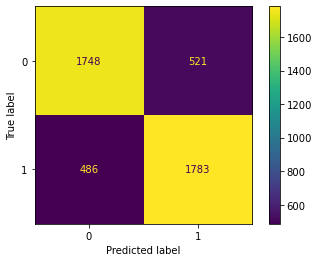

In [34]:
#creating tuning logistic model

log_tuned = LogisticRegression(random_state=87, penalty='l2', C=1.0)
log_tuned.fit(X_train_smote, y_train_smote)
y_smt_pred =  log_tuned.predict(X_test_scale)
print(classification_report(y_test, y_smt_pred))
ConfusionMatrixDisplay.from_estimator(log_tuned, X_train_smote, y_train_smote);


## Tuned baseline_model Evaluation 

we have improved our churning recall to 76% although the customer not churning was decreased to 75% the model is now better

## Decision Tree

In [35]:

tree_clf = DecisionTreeClassifier(max_depth= 7, #to have a balance between overfitting and accuracy
                                  criterion= "gini", #to have the best splits and reduce impurity at each node
                                  random_state=87, # for reproductivity
)
tree_clf.fit(X_train_scale, y_train)
y_tree_pred = tree_clf.predict(X_test_scale)

# Decision tree model score
tree_train_score = tree_clf.score(X_train_scale, y_train)
print( tree_train_score)



0.9662415603900976


In [36]:
# Cross Validation
tree_cv = cross_val_score(tree_clf, X_train_scale, y_train)
tree_cv

array([0.92134831, 0.92870544, 0.9249531 , 0.95497186, 0.92120075])

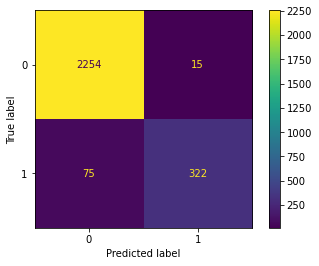

In [37]:
# Train Confusion Matrix
ConfusionMatrixDisplay.from_estimator(tree_clf, X_train_scale, y_train);

In [38]:
# Report
tree_report = classification_report(y_test, y_tree_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       581
           1       0.85      0.67      0.75        86

    accuracy                           0.94       667
   macro avg       0.90      0.83      0.86       667
weighted avg       0.94      0.94      0.94       667



# EVALUATION

 In this case, the recall for customers who did not churn is 98%, which means that 98% of the customers who did not churn were correctly predicted which is good for business. 
 The recall for customers who churned is 67%, which means that 67% of the customers who churned was correctly predicted this is a good number which means our modell is predicting well
 

# K-NEAREST NEIGHBORS

In [39]:
#instanciating and fitting knn model
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train_scale, y_train)
knn_y_pred = knn_clf.predict(X_test_scale)
knn_y_pred_proba = knn_clf.predict_proba(X_test_scale)


In [40]:
#getting the model score
knn_clf_score = knn_clf.score(X_train_scale, y_train)
knn_clf_score

0.9167291822955739

In [41]:
# Cross Validation
knn_clf_cvscore = cross_val_score(knn_clf, X_train, y_train)
knn_clf_cvscore

array([0.8670412 , 0.87429644, 0.87992495, 0.87242026, 0.85553471])

In [42]:
# Report 
knn_clf_creport = classification_report(y_test, knn_y_pred)
print(knn_clf_creport)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       581
           1       0.65      0.35      0.45        86

    accuracy                           0.89       667
   macro avg       0.78      0.66      0.70       667
weighted avg       0.88      0.89      0.88       667



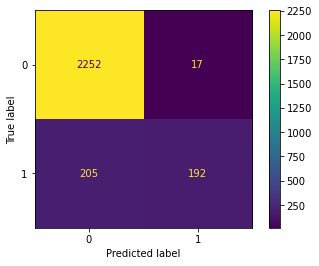

In [43]:
# With estimators
ConfusionMatrixDisplay.from_estimator(knn_clf, X_train_scale, y_train);

# EVALUATION
 In this case, the recall for customers who did not churn is 97%, which means that 97% of the customers who did not churn were correctly predicted which is good for business. 
 The recall for customers who churned is 35%, which means that 35% of the customers who churned was correctly predicted this is good for business so we will tune our hyperparameters and use resampled data.
 

## knn_model tuning

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       581
           1       0.31      0.60      0.41        86

    accuracy                           0.78       667
   macro avg       0.62      0.70      0.64       667
weighted avg       0.85      0.78      0.80       667



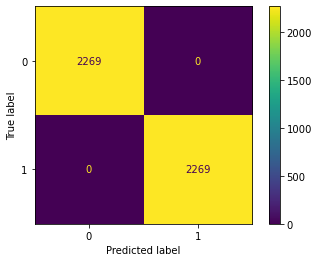

In [44]:
knn = KNeighborsClassifier()
#hyperparameters to tune
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['ball_tree', 'kd_tree']
}
# Instantiate the grid search model to look for best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_smote, y_train_smote)

# evaluate the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
knn_y_pred = best_model.predict(X_test_scale)
print(classification_report(y_test, knn_y_pred))
ConfusionMatrixDisplay.from_estimator(grid_search, X_train_smote, y_train_smote);




## Tuned knn_model  EVALUATION
we have improved our churning recall to 60% from the initial 35% although the customer not churning was decreased to 80% the model is now better performing than our initial model

# Random Forest

In [45]:
# instanciate and fit random forest classifier

rfc_clf = RandomForestClassifier(n_estimators=5, random_state=87)


rfc_clf.fit(X_train_scale, y_train)

rfc_clf_pred = rfc_clf.predict(X_test_scale)

In [46]:
rfc_clf_score = rfc_clf.score(X_train_scale, y_train)
rfc_clf_score

0.991747936984246

In [47]:
# Cross validation
rfc_clf_cvscore = cross_val_score(rfc_clf, X_train_scale, y_train)
rfc_clf_cvscore

array([0.93445693, 0.9249531 , 0.93058161, 0.93621013, 0.90243902])

In [48]:
# Report
rfc_clf_creport = classification_report(y_test, rfc_clf_pred)
print(rfc_clf_creport)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       581
           1       0.88      0.60      0.72        86

    accuracy                           0.94       667
   macro avg       0.91      0.80      0.84       667
weighted avg       0.94      0.94      0.93       667



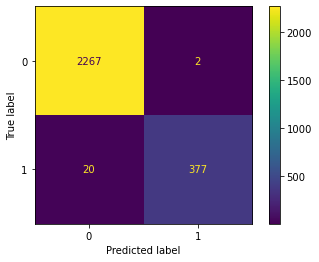

In [49]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rfc_clf, X_train_scale, y_train);

# Evaluation  

Random forest classifier has not churning recall of 99% and a recall churn of 60% which is good for our model

# CONCLUSION

- From our EDA we can conclude that customers who have international plan have a higher percentage of churning.

- Our EDA revealed that the dataset was highly imbalanced, with a small percentage of churn.

- From EDA we noticed all numerical columns are normaly distributed

- From our EDA we noticed that most of the selected variables had a low correlation with churn

- from our analysis the best model we choose  is Decision tree  because it has the best recall of 98% not churning and 67% churn which is the best model to predict whether a customer will churn.
 

# RECOMMENDATION

- obtain more balanced data
- Look into more variables that may have effect on churn like gender, regions and age-group.
- Get more data to improve the classification models.
